In [76]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the dataset and preprocessing it.

In [2]:
ds = pd.read_csv('car data.csv')

In [3]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
ds = ds.drop('Car_Name', axis = 1)

In [8]:
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
print(ds['Fuel_Type'].unique())
print(ds['Seller_Type'].unique())
print(ds['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [14]:
ds['current'] = 2020

In [15]:
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [17]:
ds['Nof_Years'] = ds['current'] - ds['Year']

In [18]:
ds.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current,Nof_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [21]:
ds = ds.drop(['current','Year'], axis = 1)

In [22]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Nof_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [23]:
ds = pd.get_dummies(ds, drop_first = True)

In [24]:
ds.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Nof_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# Visualizing the data.

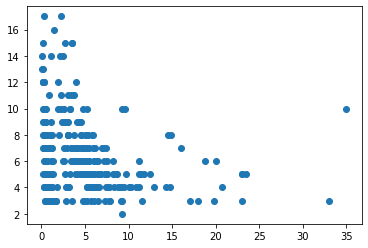

In [85]:
plt.scatter(ds['Selling_Price'] , ds['Nof_Years'])

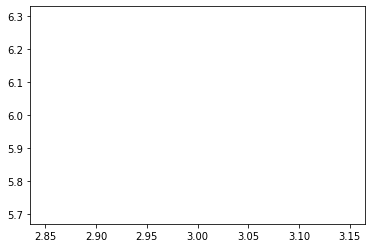

In [89]:
plt.plot(3 ,6)

No handles with labels found to put in legend.


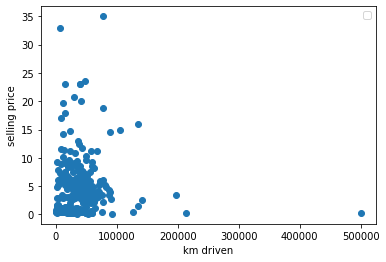

In [31]:
plt.scatter(ds['Kms_Driven'] , ds['Selling_Price'])
plt.xlabel('km driven')
plt.ylabel('selling price')
plt.legend()

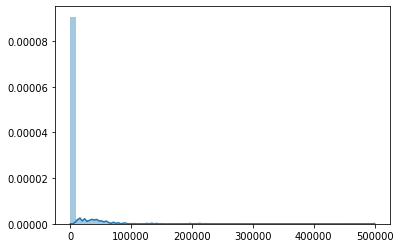

In [33]:
sns.distplot(ds)

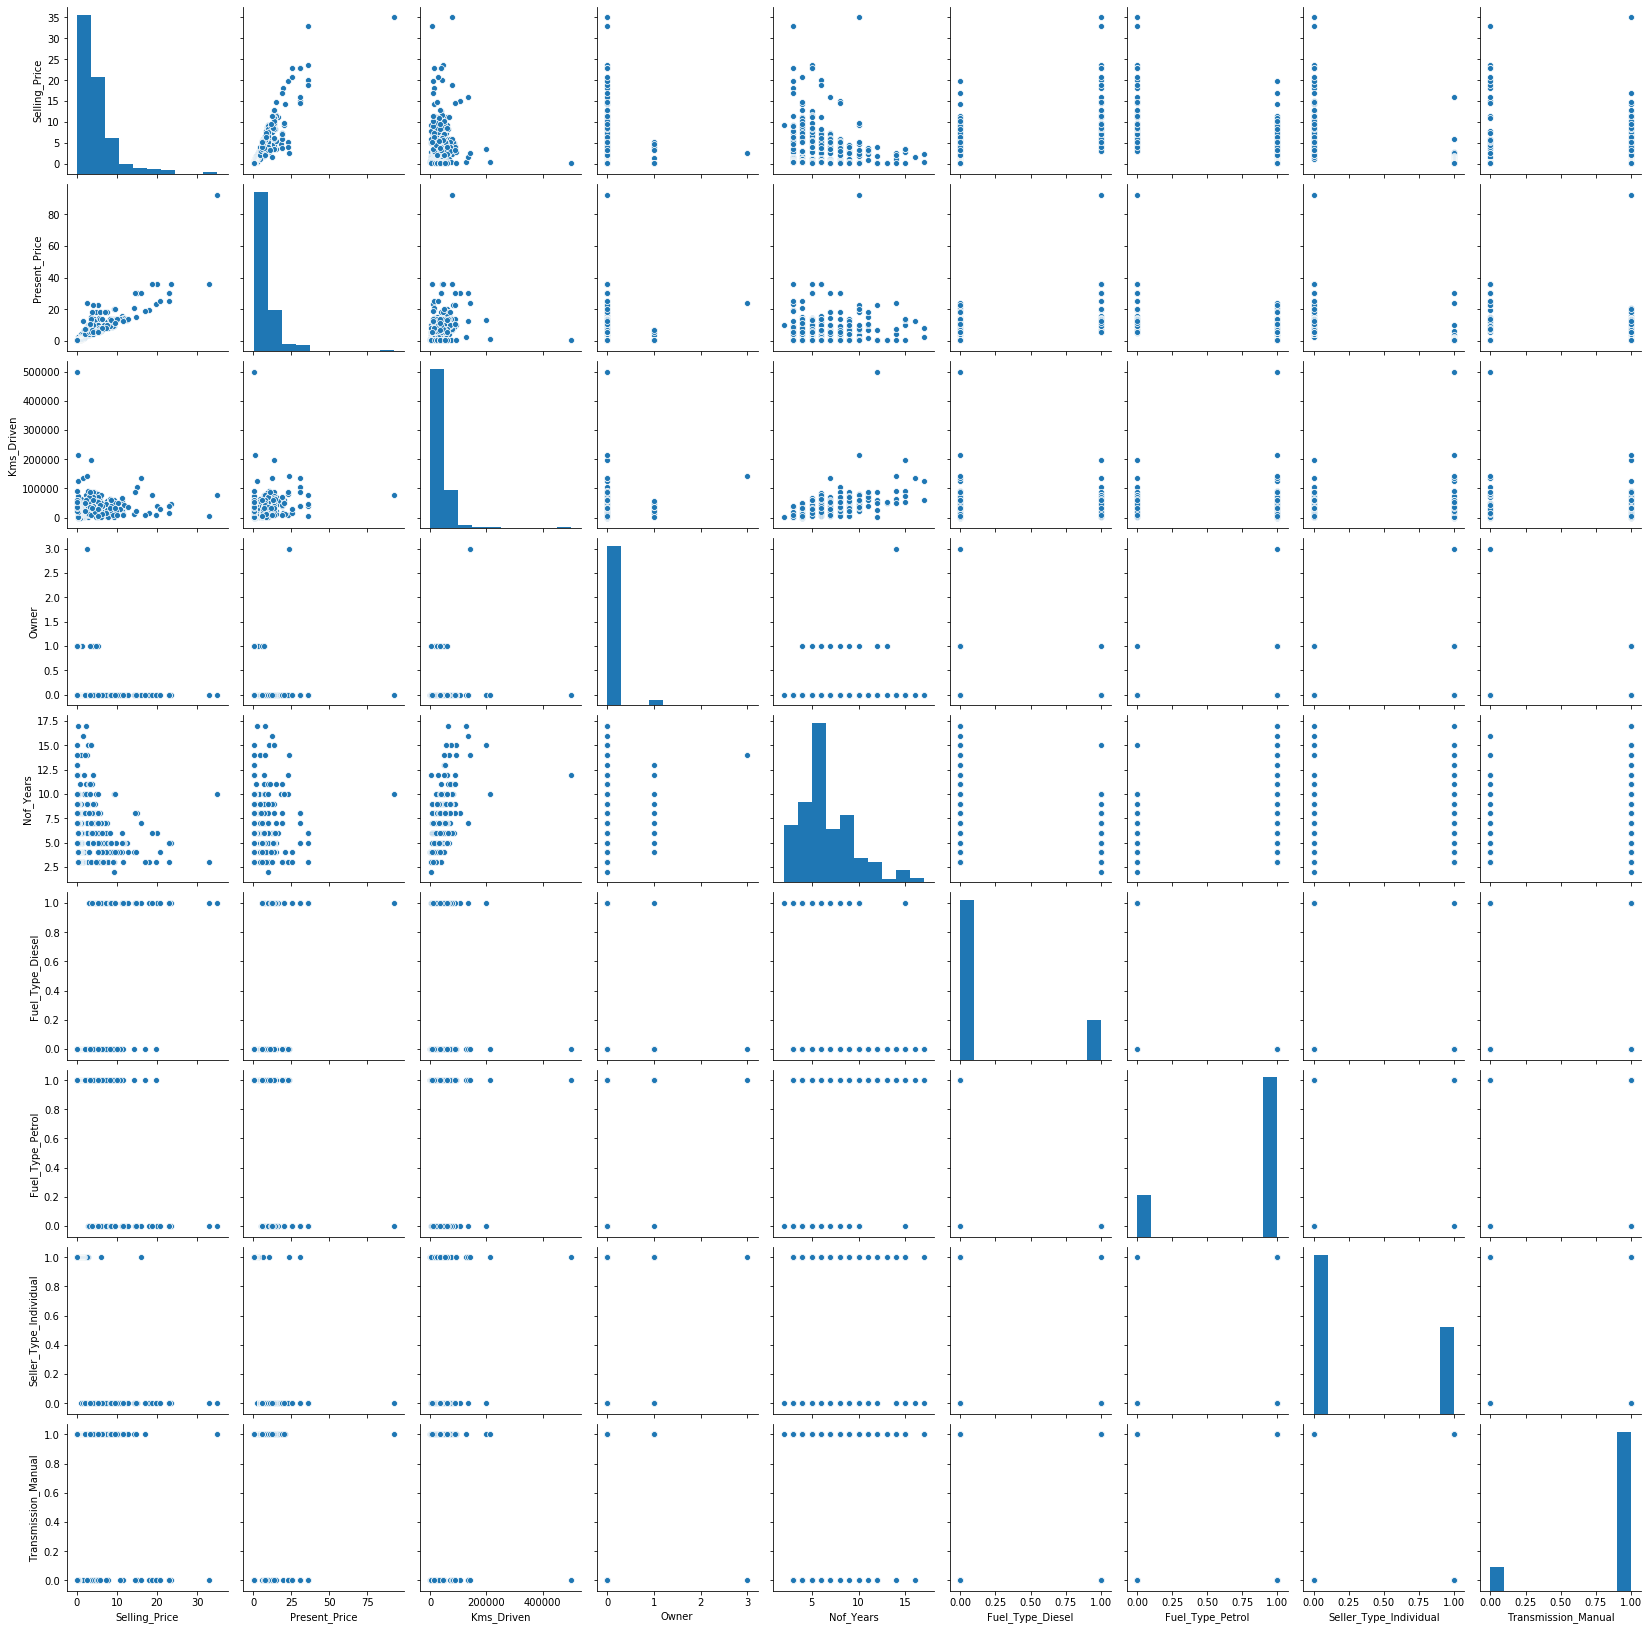

In [35]:
sns.pairplot(ds)

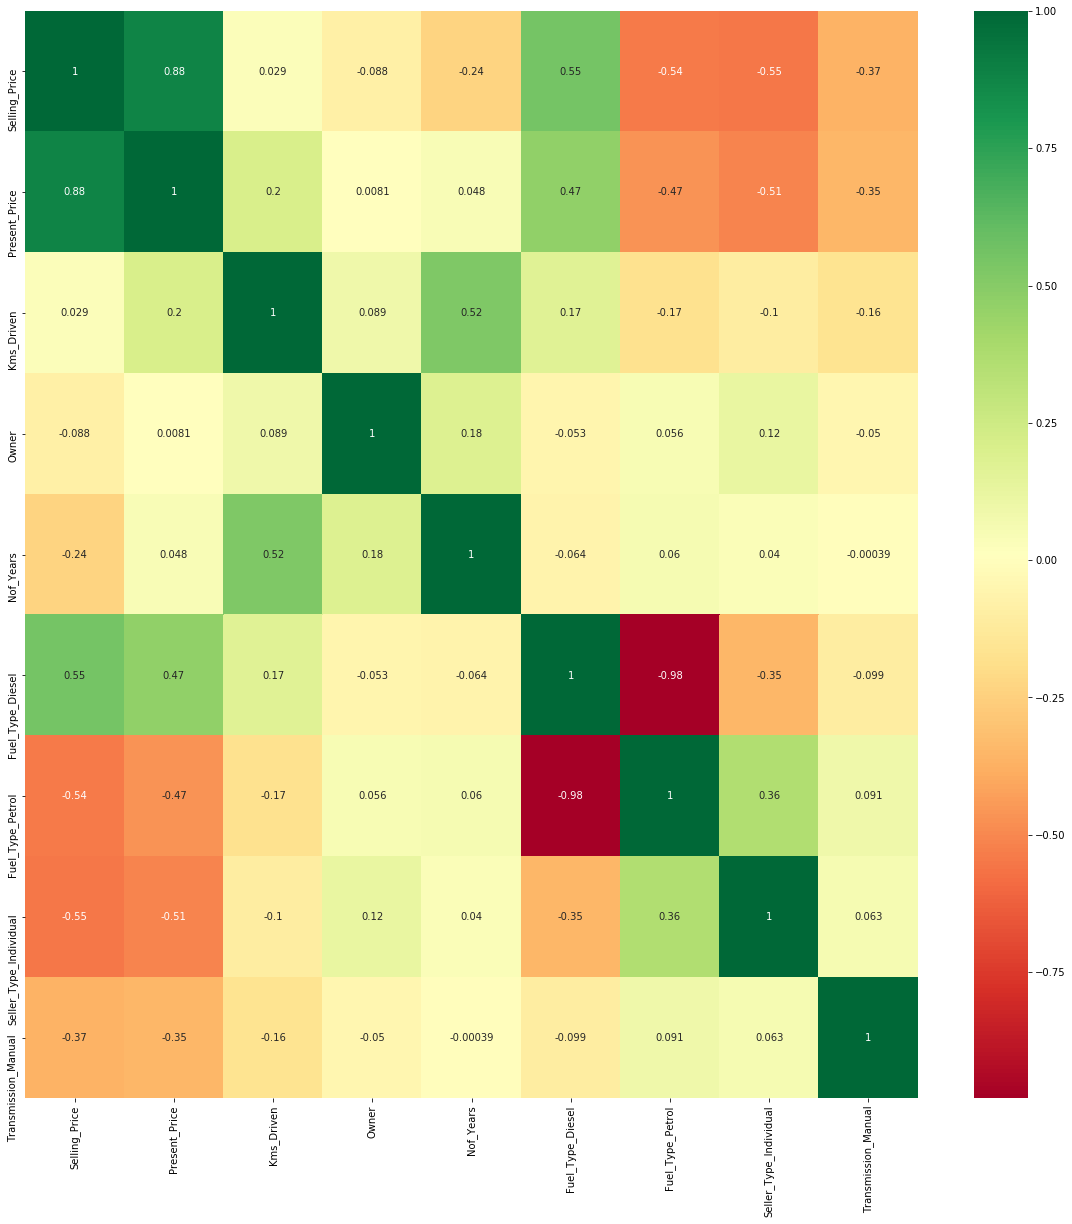

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(), annot = True, cmap = 'RdYlGn')

# Performing feature selection.

In [51]:
x = ds.iloc[:,1:]
y = ds.iloc[:,0]

In [78]:
x.head()

,Present_Price,Kms_Driven,Owner,Nof_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [54]:
model = ExtraTreesRegressor()

In [55]:
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

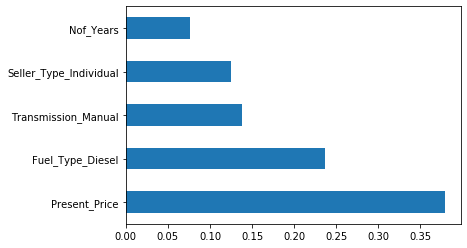

In [57]:
imp = pd.Series(model.feature_importances_,index = x.columns)
imp.nlargest(5).plot(kind = 'barh')

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Hyperparameter tuning.

In [60]:
rf = RandomForestRegressor()

In [65]:
estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
maxf = ['auto','sqrt']
dept = [int(x) for x in np.linspace(5, 30, num = 6)]
mins = [2, 5, 10, 15, 100]
minl = [1, 2, 5, 10]

In [66]:
param = {'n_estimators': estimators,
        'max_features': maxf,
        'max_depth': dept,
        'min_samples_split': mins,
        'min_samples_split' :minl
        }

In [68]:
randcv = RandomizedSearchCV(estimator = rf, 
                            param_distributions = param, 
                            scoring = 'neg_mean_squared_error',
                           n_iter = 10,
                           cv = 5,
                           verbose = 2,
                           random_state = 42,
                           n_jobs = 1)

In [69]:
randcv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15 
[CV]  n_estimators=700, min_samples_split=10, max_features=auto, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1100, min_samples_split=2, max_features=auto, max_depth=10, total=   2.0s
[CV] n_estimators=1100, min_samples_split=2, max_fea

N:\Jupy\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


N:\Jupy\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


N:\Jupy\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


N:\Jupy\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20 


N:\Jupy\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=1100, min_samples_split=1, max_features=sqrt, max_depth=20, total=   0.5s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   1.3s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   1.4s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   1.2s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   1.2s
[CV] n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=2, max_features=auto, max_depth=30, total=   1.2s
[CV] n_estimators=700, min_samples_split=2, max_features=auto,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [70]:
y_hat = randcv.predict(x_test)

# Visualizing the results & saving the  model.

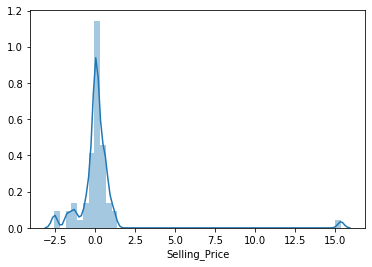

In [71]:
sns.distplot(y_test-y_hat)

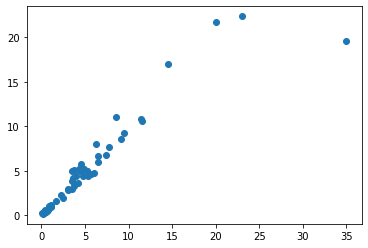

In [72]:
plt.scatter(y_test,y_hat)

In [77]:
pik = open('car_r.p','wb')
pickle.dump(randcv,pik)
pik.close()